In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
X = dbinom(57, 100, .5)

In [3]:
likelihood <- function(theta, N, S) {
  dbinom(S, size = N, prob = theta)
}

In [4]:
thetas <- seq(0, 1, by = .1)
prior <- rep(1 / length(thetas), length(thetas))
N <- 100
s <- 57

In [5]:
L <- sapply(thetas, likelihood, N = N, S = s)
df <- data.frame(theta = thetas, likelihood = L)

p <- ggplot(df, aes(x = theta, y = likelihood)) +
  geom_line(size = 1.2) +
  labs(
    title = expression("Likelihood Function for " * theta),
    x = expression(theta),
    y = expression(L(theta) ~ "|" ~ Y == 57 * "," ~ N == 100)
  ) +
  theme_minimal(base_size = 14) +
  theme(
    panel.background = element_rect(fill = "white", color = NA),
    plot.background  = element_rect(fill = "white", color = NA)
  )

ggsave("../Figures/Assignment_1/likelihood_plot.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


In [6]:

unnorm_post <- L * prior
posterior <- unnorm_post / sum(unnorm_post)

df <- data.frame(thetas, posterior)
p <- ggplot(df, aes(x = thetas, y = posterior)) +
  geom_line(aes(group = 1), linewidth = 1) +
  labs(
    title = expression("Posterior distribution of " * theta * " given " * sum(Y[i]) == 57),
    x = expression(theta),
    y = "Posterior probability"
  ) +
  theme_minimal(base_size = 14) + 
  theme(
    panel.background = element_rect(fill = "white", color = NA),
    plot.background  = element_rect(fill = "white", color = NA)
  )


ggsave("../Figures/Assignment_1/discrete_posterior.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

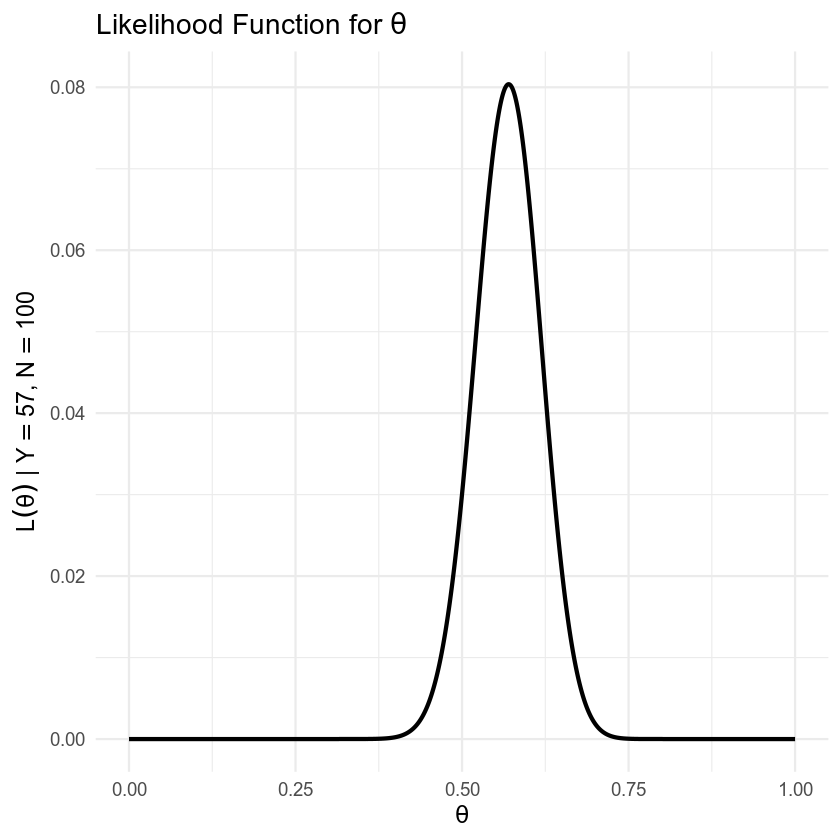

In [7]:
thetas <- seq(0, 1, length.out = 2000)
L <- sapply(thetas, likelihood, N = N, S = s)
df <- data.frame(theta = thetas, likelihood = L)

p <- ggplot(df, aes(x = thetas, y = likelihood)) +
  geom_line(size = 1.2) +
  labs(
    title = expression("Likelihood Function for " * theta),
    x = expression(theta),
    y = expression(L(theta) ~ "|" ~ Y == 57 * "," ~ N == 100)
  ) +
  theme_minimal(base_size = 14) +
  theme(
    panel.background = element_rect(fill = "white", color = NA),
    plot.background  = element_rect(fill = "white", color = NA)
  )
p
ggsave("../Figures/Assignment_1/likelihood_plot_continuous.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

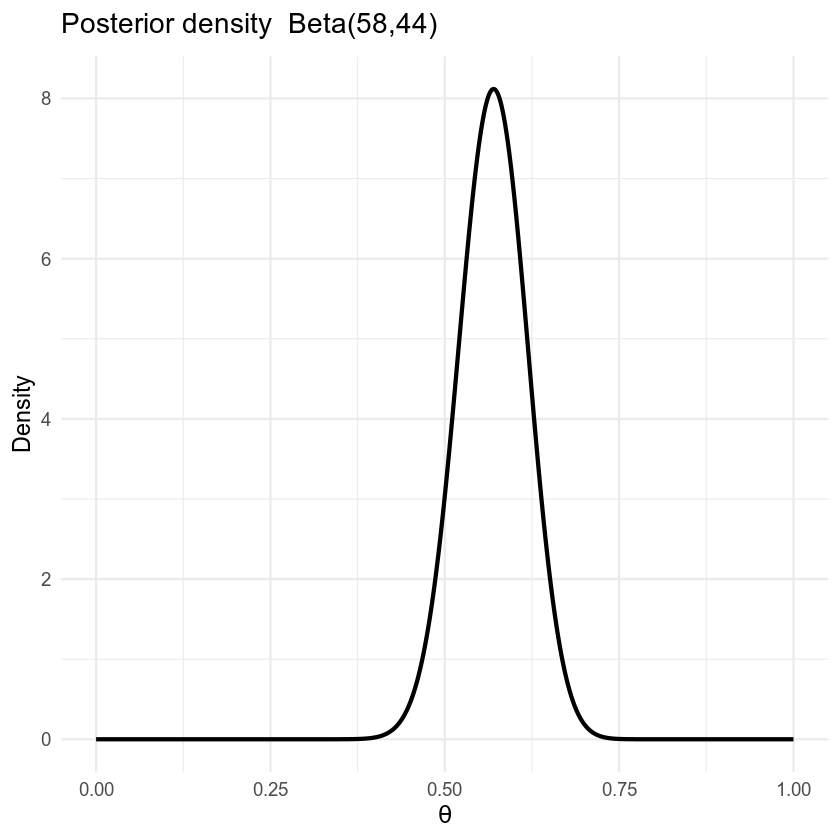

In [8]:
post_a <- 58; post_b <- 44
df_e <- data.frame(thetas, density = dbeta(thetas, post_a, post_b))

p<- ggplot(df_e, aes(thetas, density)) +
  geom_line(linewidth = 1.2) +
  labs(
    title = expression("Posterior density  Beta(58,44)"),
    x = expression(theta), y = "Density"
  ) +
  theme_minimal(base_size = 14)

p
ggsave("../Figures/Assignment_1/beta.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

### Question 3.3.

In [9]:
y_a = c(12, 9, 12, 14, 13, 12, 15, 8, 15, 6)
y_b = c(11, 11, 10, 9, 9 , 8, 7, 10, 6, 8, 8, 9, 7 )

In [10]:
sum(y_a)
length(y_a)

[1] 116

[1] 10

In [11]:
sum(y_b)
length(y_b)

[1] 113

[1] 13

In [12]:
qgamma(c(0.025, 0.975), shape = 237, rate = 20)


[1] 10.38924 13.40545

In [13]:
qgamma(c(0.025, 0.975), shape = 125, rate = 14)

[1]  7.432064 10.560308

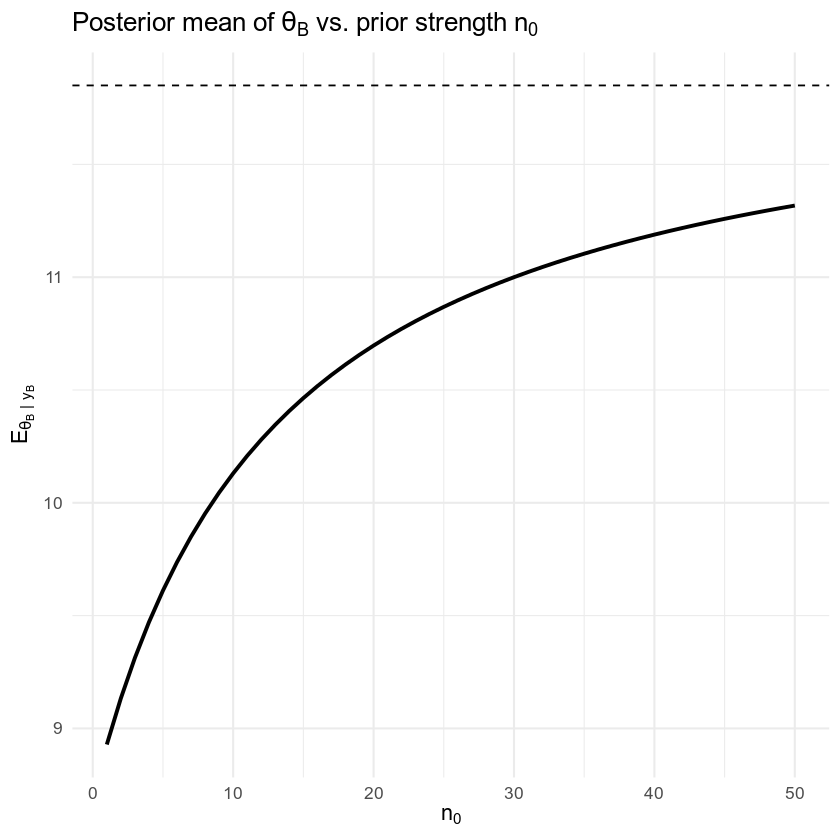

In [14]:
n0 <- 1:50
nB <- 13; sB <- 113
post_mean_B <- (12*n0 + sB)/(n0 + nB)

df <- data.frame(n0, post_mean_B)

p <- ggplot(df, aes(n0, post_mean_B)) +
  geom_line(linewidth = 1.1) +
  geom_hline(yintercept = 11.85, linetype = 2) +  
  labs(x = expression(n[0]),
       y = expression(E[theta[B]~"|"~y[B]]),
       title = expression("Posterior mean of " * theta[B] * " vs. prior strength " * n[0])) +
  theme_minimal(base_size = 13)
p
ggsave("../Figures/Assignment_1/changing_priors.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

### Question 3.3.

In [15]:
n <- 43; y <- 15


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Like   p(y|θ)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Like   p(y|θ)' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Post   p(θ|y)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Post   p(θ|y)' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Prior  p(θ)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Prior  p(θ)' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in g

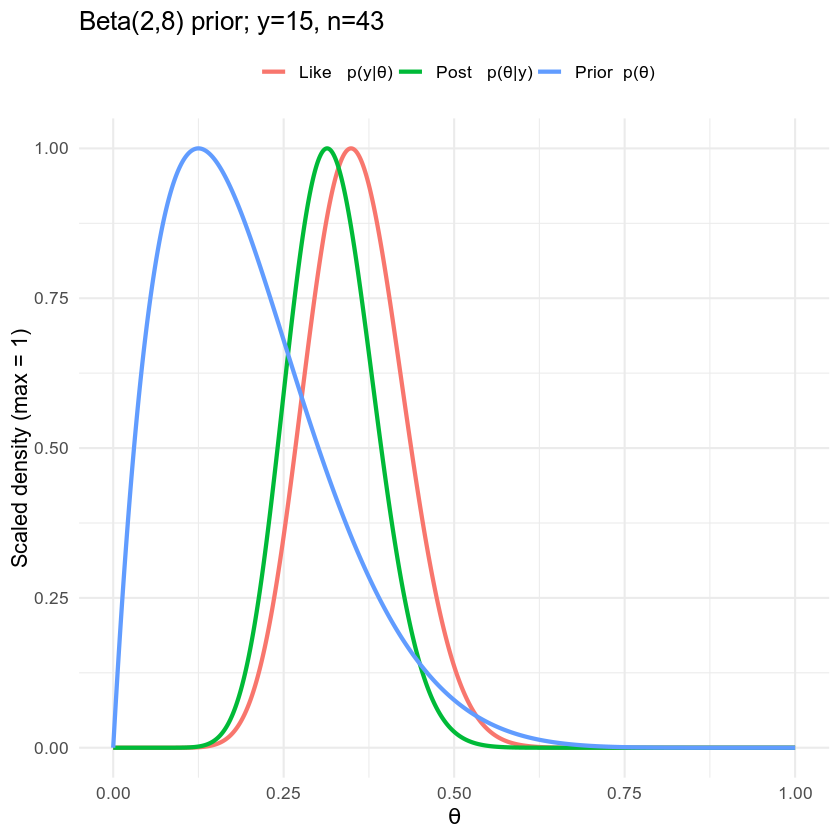

In [16]:
n <- 43
y <- 15
a <- 2
b <- 8
post_a <- a+y
post_b <- (b +(n-y))

prior <- dbeta(thetas, a, b)
posterior  <- dbeta(thetas, post_a, post_b)
likelihood <- dbinom(y, size = n, prob = thetas) 


df <- tibble(
  thetas, 
  `Prior  p(θ)`   = prior / max(prior),
  `Like   p(y|θ)` = likelihood / max(likelihood),
  `Post   p(θ|y)` = posterior / max(posterior)
) |>
    pivot_longer(-thetas, names_to = "curve", values_to = "density")

p<- ggplot(df, aes(thetas, density, color = curve)) +
  geom_line(linewidth = 1.2) +
  labs(
      x = expression(theta),
      y = "Scaled density (max = 1)",
      title = sprintf("Beta(%g,%g) prior; y=%d, n=%d", a, b, y, n),
      color = NULL
    ) +
  theme_minimal(base_size = 13) +
  theme(legend.position = "top")
  

p
ggsave("../Figures/Assignment_1/beta_2_8.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

In [17]:
post_mean <- post_a / (post_a + post_b)
post_sd   <- sqrt(post_a * post_b / ((post_a + post_b)^2 * (post_a + post_b + 1)))
post_mode <- if (post_a > 1 && post_b > 1) (post_a - 1) / (post_a + post_b - 2) else NA_real_
post_ci   <- qbeta(c(0.025, 0.975), post_a, post_b)

post_mean
post_sd
post_mode 
post_ci

[1] 0.3207547

[1] 0.0635189

[1] 0.3137255

[1] 0.2032978 0.4510240

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Like   p(y|θ)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Like   p(y|θ)' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Post   p(θ|y)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Post   p(θ|y)' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Prior  p(θ)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Prior  p(θ)' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in g

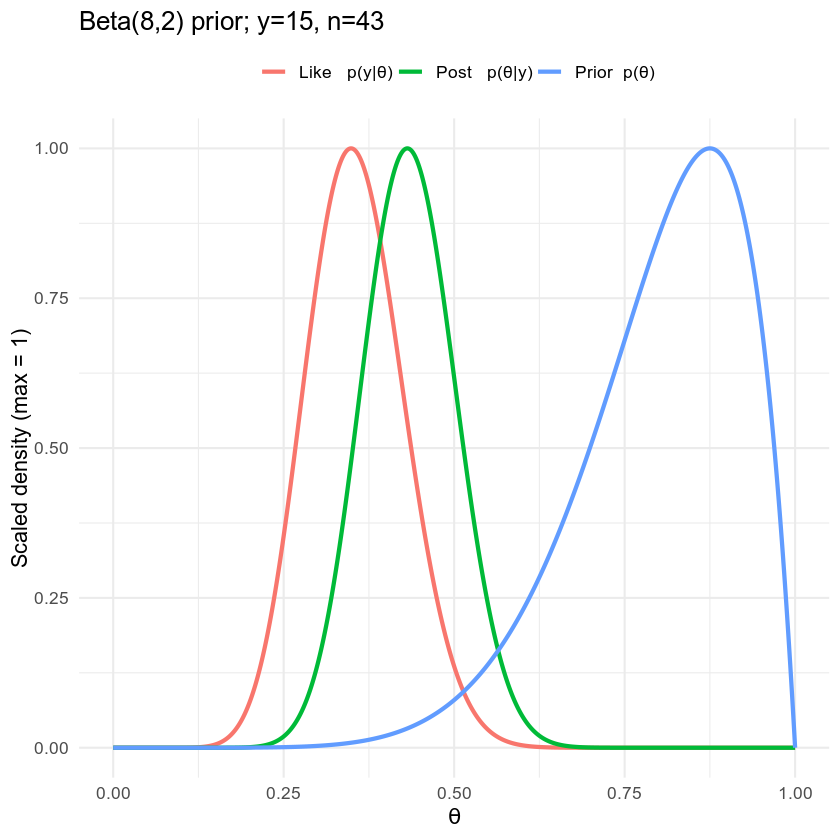

In [18]:
n <- 43
y <- 15
a <- 8
b <- 2
post_a <- a+y
post_b <- (b +(n-y))

prior <- dbeta(thetas, a, b)
posterior  <- dbeta(thetas, post_a, post_b)
likelihood <- dbinom(y, size = n, prob = thetas) 


df <- tibble(
  thetas, 
  `Prior  p(θ)`   = prior / max(prior),
  `Like   p(y|θ)` = likelihood / max(likelihood),
  `Post   p(θ|y)` = posterior / max(posterior)
) |>
    pivot_longer(-thetas, names_to = "curve", values_to = "density")

p<- ggplot(df, aes(thetas, density, color = curve)) +
  geom_line(linewidth = 1.2) +
  labs(
      x = expression(theta),
      y = "Scaled density (max = 1)",
      title = sprintf("Beta(%g,%g) prior; y=%d, n=%d", a, b, y, n),
      color = NULL
    ) +
  theme_minimal(base_size = 13) +
  theme(legend.position = "top")
  

p
ggsave("../Figures/Assignment_1/beta_8_2.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

In [19]:
post_mean <- post_a / (post_a + post_b)
post_sd   <- sqrt(post_a * post_b / ((post_a + post_b)^2 * (post_a + post_b + 1)))
post_mode <- if (post_a > 1 && post_b > 1) (post_a - 1) / (post_a + post_b - 2) else NA_real_
post_ci   <- qbeta(c(0.025, 0.975), post_a, post_b)

post_mean
post_sd
post_mode 
post_ci

[1] 0.4339623

[1] 0.06744532

[1] 0.4313725

[1] 0.3046956 0.5679528

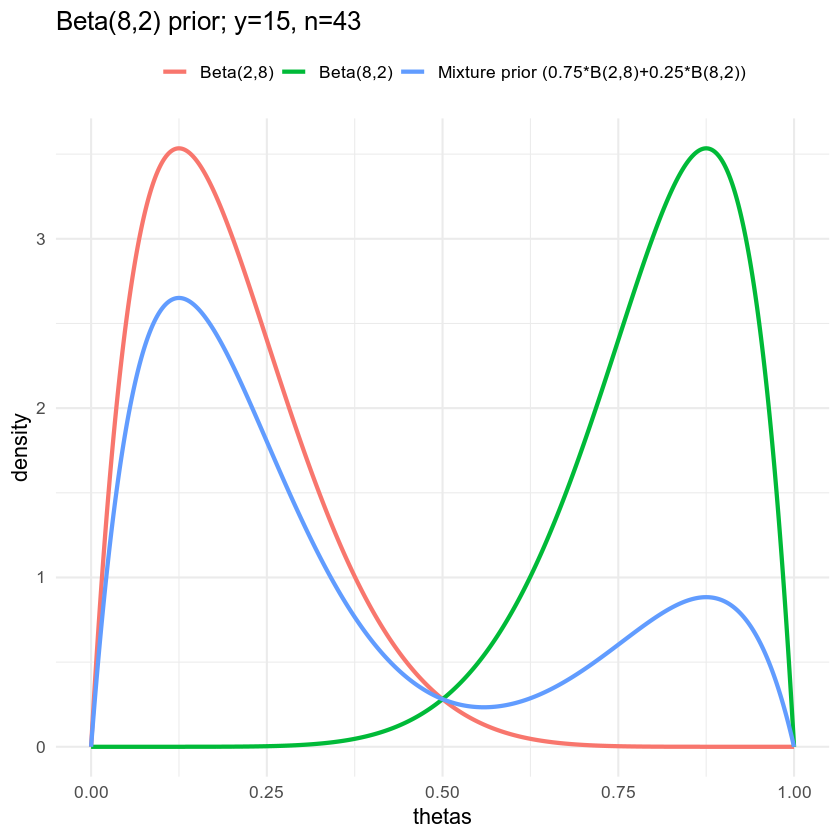

In [21]:
p_mix <- 0.75 * dbeta(thetas, 2, 8) + 0.25 * dbeta(thetas, 8, 2)

# Components for comparison
p_beta28 <- dbeta(thetas, 2, 8)
p_beta82 <- dbeta(thetas, 8, 2)

df <- tibble(
  thetas,
  `Mixture prior (0.75*B(2,8)+0.25*B(8,2))` = p_mix,
  `Beta(2,8)` = p_beta28,
  `Beta(8,2)` = p_beta82
) |>
  pivot_longer(-thetas, names_to = "curve", values_to = "density")


p<- ggplot(df, aes(thetas, density, color = curve)) +
  geom_line(linewidth = 1.2) +
  labs(
      x = expression(thetas),
 
      title = sprintf("Beta(%g,%g) prior; y=%d, n=%d", a, b, y, n),
      color = NULL
    ) +
  theme_minimal(base_size = 13) +
  theme(legend.position = "top")


p
ggsave("../Figures/Assignment_1/mix.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")